# Project: Investigating a Dataset of medical appointments in Brazil.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset which I'm going to analyse collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

#### Question I want to explore in the dataset: 
How do factors like age of patients, their gender, the diseases they have, and whether or not they received an SMS affect or influence the showing up of patients on their appointment day?

In [1]:
## Importing all the necessary libraries for the investigation.

import numpy as np
import pandas as pd
import seaborn as sns
%pylab  inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


<a id='wrangling'></a>
## Data Wrangling

#### Data Aquisition

In [2]:
## Loading the data into a dataframe.
appointments = pd.read_csv('./data/noshowappointments.csv')

## Looking at the first 5 rows of data. 
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
## Checking the number of rows and columns in the data.
appointments.shape

(110527, 14)

The first thing I noticed here is that some column names have been misspelled like Hipertension, Handcap etc. I need to change those right away so that I do not get confused later. 

In [4]:
## Renaming the column names with wrong spellings.
appointments.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace=True)

In [5]:
## Looking at the first 5 rows of data. 
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Next, I want to check if there are any missing values in the data, and also if there is any invalid data present.

In [6]:
## Checking if there are any missing values in the dataframe.
## The following function will check if any value is 'nan' in the dataframe.
appointments.isnull().sum().sum()

0

*We can see that there is no missing data present as the above function returns 0.*

Since there are no missing values in the dataframe, we're good to go. 

Now, checking if there are any errant data or invalid data.
I'll check if there are any invalid values in each column in the dataframe. To do this, I'll make a set of unique values for every column to check if any values are out of range.

In [7]:
## Gender Column
gender_set = set(appointments['Gender'])
print "Gender:" 
print gender_set

Gender:
set(['M', 'F'])


In [8]:
## Age Column
age_set = set(appointments['Age'])
print "Age:"
print age_set

Age:
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115, -1])


*Here, I notice that the age is going beyond 100 in some cases, and even negative for many patients. It can't be possible for people to have negative age. We should only consider people till the age of 90 or 100, as it is very difficult for people to have age more than 100 which might be wrongly entered for many patients in the given data.* 

In [9]:
## Scholarship column 
scholarship_set = set(appointments['Scholarship'])
print "Scholarship:"
print scholarship_set

Scholarship:
set([0, 1])


In [10]:
## Hypertension column
hypertension_set = set(appointments['Hypertension'])
print "Hypertension:"
print hypertension_set

Hypertension:
set([0, 1])


In [11]:
## Diabetes column
diabetes_set = set(appointments['Diabetes'])
print "Diabetes:"
print diabetes_set

Diabetes:
set([0, 1])


In [12]:
## Alcoholism column
alcoholism_set = set(appointments['Alcoholism'])
print "Alcoholism:"
print alcoholism_set

Alcoholism:
set([0, 1])


In [13]:
## Handicap column
handicap_set = set(appointments['Handicap'])
print "Handicap:"
print handicap_set

Handicap:
set([0, 1, 2, 3, 4])


*Here, I notice that handicap values are 0.1,2,3 and 4. This is strange as handicap values should be either 1 or 0 depending on whether the person is handicapped or not. I need to remove the rows which contain handicap values apart from 0 or 1.*

In [14]:
## SMS_received column
sms_received_set = set(appointments['SMS_received'])
print "SMS_received:"
print sms_received_set

SMS_received:
set([0, 1])


In [15]:
## No-show column
no_show_set = set(appointments['No-show'])
print "No-show:"
print no_show_set

No-show:
set(['Yes', 'No'])


### Data Cleaning 

Now, I need to clean the data. I noticed some invalid values in the 'Age' and 'Handicap' columns. I will remove the appointments corresponding to those invalid values to make my data cleaner.

In [16]:
## Age and handicap column cleaning

## Taking only those rows in the data in which the patient's age is between 0 and 100.
appointments = appointments[(appointments['Age']>=0) & (appointments['Age']<=100)]

## Taking only those rows in the data in which the patient's state of handicap is either 0 or 1. 
appointments = appointments[(appointments['Handicap']>=0) & (appointments['Handicap']<=1)]

In [17]:
## Checking if the age column data and the handicap column data has been cleaned or not.
age_set = set(appointments['Age'])
print "Age:"
print age_set

print

handicap_set = set(appointments['Handicap'])
print "Handicap:"
print handicap_set

Age:
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])

Handicap:
set([0, 1])


## Cleaning a bit more

The ScheduledDay and AppointmentDay columns are present in types which are not much understandable by me. It is also visible in the table that the time in the AppointmentDay column is same for all the appointments which is 00:00:00. 

I want to convert these two columns into datetime object to see things a bit more clearly. 

In [18]:
## Converting the 2 columns into datetime.

appointments['ScheduledDay'] = pd.to_datetime(appointments['ScheduledDay'])
appointments['AppointmentDay'] = pd.to_datetime(appointments['AppointmentDay'])

In [19]:
## Looking at the first 5 rows of data. 
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


*Here, we can see that the times in the AppointmentDay columns has disappered as they were all 00:00:00.*  

Now, I would like to create a column to denote the number of days between a person scheduled an appointment and the Appointment day. As the number of days in between them might give us some more information about the data.

In [20]:
## Creating a new column for the number of days in between ScheduledDay and AppointmentDay.
appointments['Days'] = (appointments['AppointmentDay'] - appointments['ScheduledDay']).dt.days

## Rearranging the columns so that the Days column come at the 5th position.
appointments = appointments[['PatientId', 'AppointmentID','Gender','ScheduledDay','AppointmentDay','Days','Age',
                             'Neighbourhood','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap',
                             'SMS_received','No-show']]

## Looking at the first 5 rows of data. 
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Days,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,-1,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,-1,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,-1,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,-1,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,-1,56,JARDIM DA PENHA,0,1,1,0,0,0,No


*Here, I noticed that even when the ScheduledDay date and AppointmentDay date are on the same day for some rows, the days column is showing -1 in those cases. I should remove the time ScheduledDay column as well to get the correct results.*

In [21]:
## Removing the time in the ScheduledDay column.
appointments['ScheduledDay'] = pd.DatetimeIndex(appointments.ScheduledDay).normalize()

## Doing the same for AppointmentDay column to be on the safe side.
appointments['AppointmentDay'] = pd.DatetimeIndex(appointments.AppointmentDay).normalize()

## Looking at the first 5 rows of data.
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Days,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,-1,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,-1,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,-1,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,-1,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,-1,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
## Re-assigning the values for the Days column. 
appointments['Days'] = (appointments['AppointmentDay'] - appointments['ScheduledDay']).dt.days

## Looking at the first 5 rows of data.
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Days,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I want to re-check now if the days are coming correctly now. I'll follow the same procedure as I did for the Age column and check it's range.

I'll check if there are any invalid values in the Days column. To do this, I'll make a set of unique values for the column to check if any values are out of range.

In [23]:
days_set = set(appointments['Days'])
print "Days:"
print days_set

Days:
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179, -6, -1])


*I see here that there are still some negative values present in the days. Which means that there might be some appointment bookings in which the scheduled date is coming after the appointment date. Let's have a look at them once.*

In [24]:
## Checking the rows in which scheduled date is coming after the appointment date.
appointments[appointments['Days']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Days,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,-1,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,-1,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,-1,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,-6,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,-1,7,TABUAZEIRO,0,0,0,0,0,0,Yes


Here, I saw that there are 5 such rows. I'll remove these appoinments where days is coming negative.

In [25]:
appointments = appointments[appointments['Days']>=0]

## Looking at the first 5 rows of data.
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Days,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Our data seems to be clean now, Let me check how may rows and columns do we have now in the data.

In [26]:
appointments.shape

(110315, 15)

<a id='eda'></a>
## Exploratory Data Analysis

Let's first look at how many people do not show up for their appointment.

In [27]:
## Taking the percentage.
((appointments.groupby('No-show').size())/110315)*100

No-show
No     79.812356
Yes    20.187644
dtype: float64

Here, I notice that approximately 20% of the total appointments do not show up on their appointment day. I need to analyse what are the factors which might be correlated to this.

#### Analysing for Gender.
I'll first analyse whether or not gender affects No-show in appointments.

Making functions to group, analyse and plotting different datasets.

In [28]:
## Function to check the number of different categories of people present in the dataset.
def check_number_of(data):
    print appointments.groupby(data).size()

In [29]:
## Function to check the number of people who show-up or do not show-up for different categories.
def number_of_showup(data):
    print appointments.groupby(data)['No-show'].value_counts(normalize = 'true')

In [30]:
## Function to plot graph and analyse for the same.
def print_a_plot_for_showup(data, title):
    plt = appointments.groupby(data)['No-show'].value_counts(normalize = 'true').plot(kind = 'bar', title=title)
    print plt

We'll start the analysis for various factors now and use the above functions for it.

In [31]:
## Checking how many males and females book their appointments.
check_number_of('Gender')

Gender
F    71720
M    38595
dtype: int64


In [32]:
## Checking what percentage of males and females, show-up or do not show-up on their appointment day.
number_of_showup('Gender')

Gender  No-show
F       No         0.796960
        Yes        0.203040
M       No         0.800285
        Yes        0.199715
Name: No-show, dtype: float64


Axes(0.125,0.125;0.775x0.775)


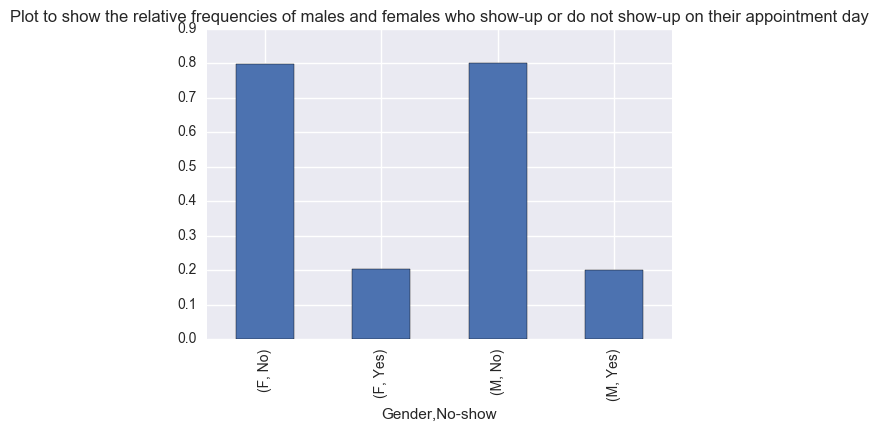

In [33]:
## Making a plot for the above. 
title_gender_plot = 'Plot to show the relative frequencies of males and females who show-up or do not show-up on their appointment day'
print_a_plot_for_showup('Gender', title_gender_plot)

Here, I notice that that approximately 20% of males and 20% of females do not show-up on their appointment day. Which means that gender cannot be a good enough prediction to predict whether or not a person will show-up on their appointment day.

#### Analysing for Scholarship
We'll do this analysis in exactly the same way we did for Gender.

In [34]:
## How many people have scholarship and how many do not.
check_number_of('Scholarship')

Scholarship
0    99472
1    10843
dtype: int64


In [35]:
## Checking for what percentage of people with or without scholarship, show-up or do not show-up on their appointment day.
number_of_showup('Scholarship')

Scholarship  No-show
0            No         0.802025
             Yes        0.197975
1            No         0.762335
             Yes        0.237665
Name: No-show, dtype: float64


Axes(0.125,0.125;0.775x0.775)


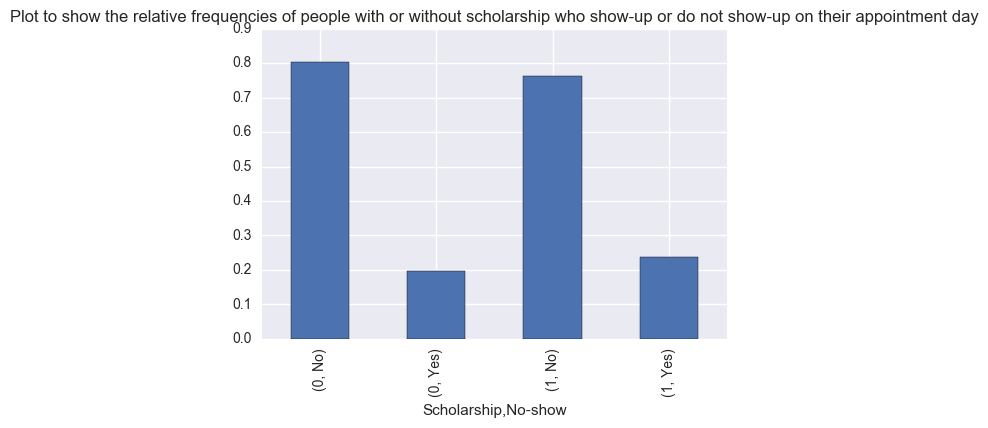

In [36]:
## Making a plot for the above.
title_scholarship_plot = 'Plot to show the relative frequencies of people with or without scholarship who show-up or do not show-up on their appointment day'
print_a_plot_for_showup('Scholarship', title_scholarship_plot)

From the above results it seems that even if the patient has a scholarship, he/she tend to not show up on the appointment day than the patients who do not have a scholarship. This correlation seems to be a bit strange to me. Which implies that maybe scholarship factor has nothing to do with a patient not showing up.

#### Analysis for Age

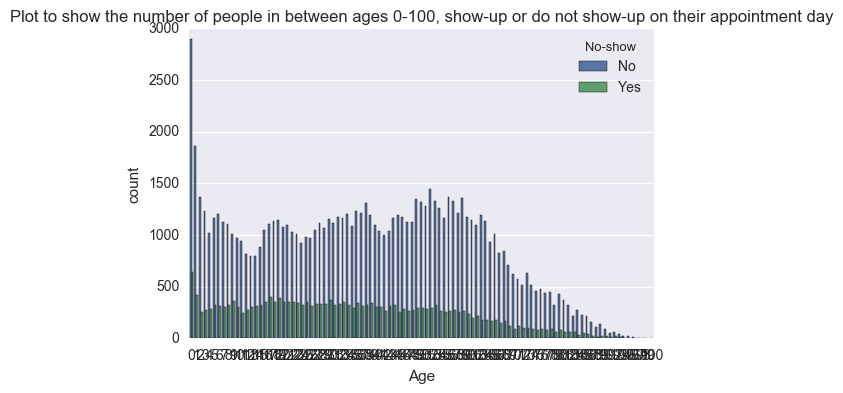

In [37]:
sns.countplot(x='Age',hue='No-show', data=appointments)
plt.title('Plot to show the number of people in between ages 0-100, show-up or do not show-up on their appointment day')
plt.show()

In this analysis, it seems that people in the age group 35-65 tend to show-up in their appointment more than the other age groups.

### Analysis for all the diseases. 
This analysis will reveal that the patients with what diseases tend to show-up for their appointments more than others.

#### Analysis for Hypertension

In [38]:
## How many patients have Hypertension and how many do not.
check_number_of('Hypertension')

Hypertension
0    88600
1    21715
dtype: int64


In [39]:
## Checking for what percentage of people with or without Hypertension, show-up or do not show-up on their appointment day.
number_of_showup('Hypertension')

Hypertension  No-show
0             No         0.790948
              Yes        0.209052
1             No         0.827400
              Yes        0.172600
Name: No-show, dtype: float64


Axes(0.125,0.125;0.775x0.775)


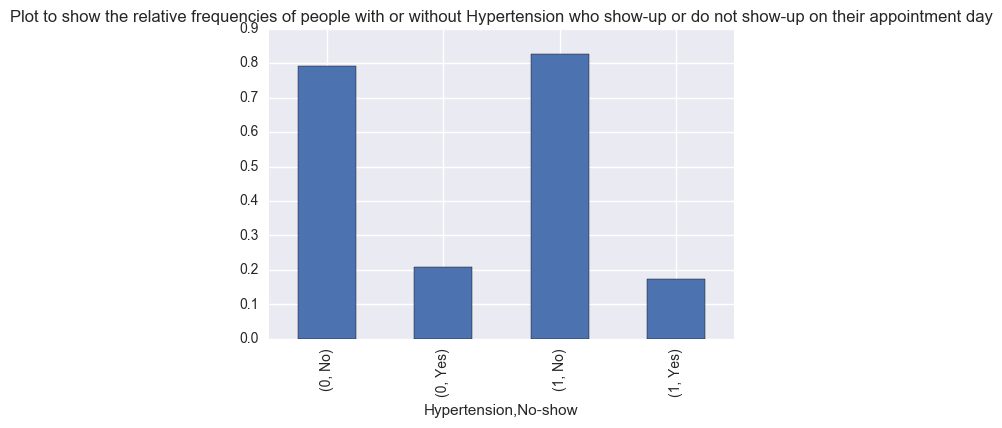

In [40]:
## Making a plot for the above. 
title_hypertension_plot = 'Plot to show the relative frequencies of people with or without Hypertension who show-up or do not show-up on their appointment day'
print_a_plot_for_showup('Hypertension', title_hypertension_plot)

From the above statistics and plot, I can correlate that the patients who have Hypertension, tend to show up on the appointment day more than who do not. 

#### Analysis for Diabetes

In [41]:
## How many patients have Diabetes and how many do not.
check_number_of('Diabetes')

Diabetes
0    102415
1      7900
dtype: int64


In [42]:
## Checking for what percentage of people with or without Diabetes, show-up or do not show-up on their appointment day.
number_of_showup('Diabetes')

Diabetes  No-show
0         No         0.796436
          Yes        0.203564
1         No         0.820000
          Yes        0.180000
Name: No-show, dtype: float64


Axes(0.125,0.125;0.775x0.775)


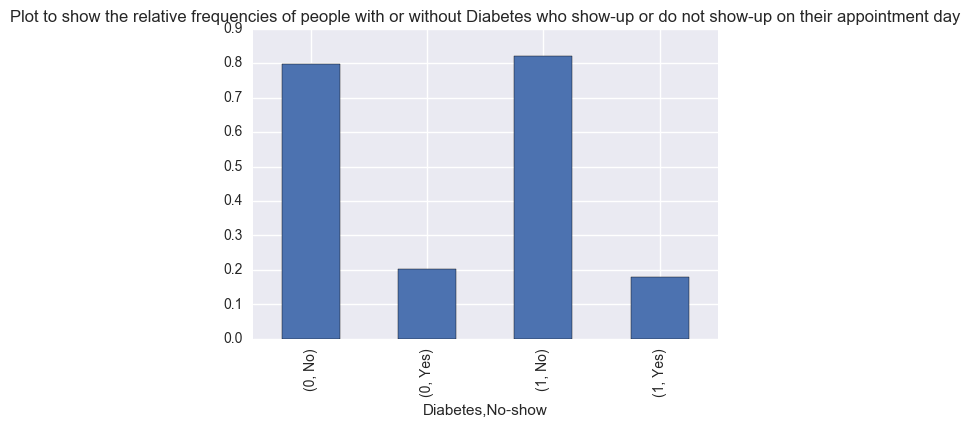

In [43]:
## Making a plot for the above. 
title_diabetes_plot = 'Plot to show the relative frequencies of people with or without Diabetes who show-up or do not show-up on their appointment day'
print_a_plot_for_showup('Diabetes', title_diabetes_plot)

From the above statistics and plot, I can correlate that the patients who have Diabetes, tend to show up on the appointment day more than who do not. 

#### Analysis for Alcoholism

In [44]:
## How many patients have Alcoholism and how many do not.
check_number_of('Alcoholism')

Alcoholism
0    106963
1      3352
dtype: int64


In [45]:
## Checking for what percentage of people with or without Alcoholism, show-up or do not show-up on their appointment day.
number_of_showup('Alcoholism')

Alcoholism  No-show
0           No         0.798108
            Yes        0.201892
1           No         0.798628
            Yes        0.201372
Name: No-show, dtype: float64


Axes(0.125,0.125;0.775x0.775)


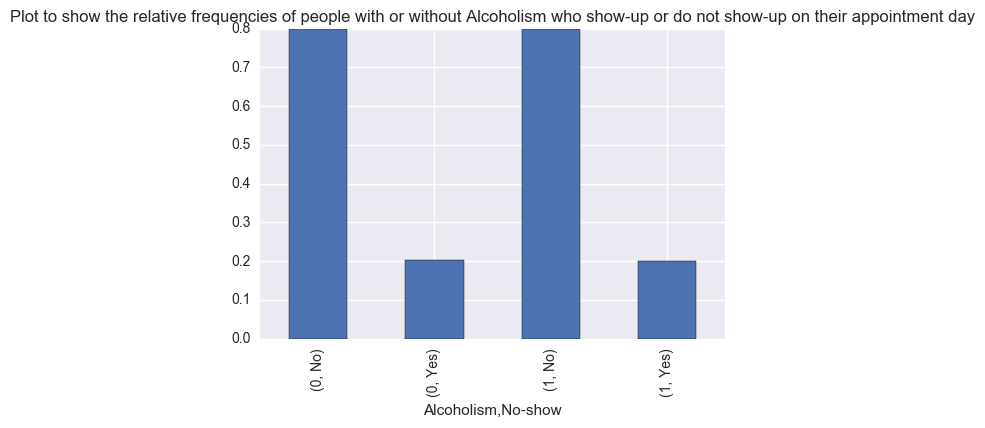

In [46]:
## Making a plot for the above. 
title_alcoholism_plot = 'Plot to show the relative frequencies of people with or without Alcoholism who show-up or do not show-up on their appointment day'
print_a_plot_for_showup('Alcoholism', title_alcoholism_plot)

From the above statistics and plot, I can correlate that the people with alcoholism tend to show-up on their appointment equally to the people who do have alcoholism.

#### Analysis for Handicap

In [47]:
## How many patients are Handicap and how many are not.
check_number_of('Handicap')

Handicap
0    108279
1      2036
dtype: int64


In [48]:
## Checking for what percentage of people who are Handicap, show-up or do not show-up on their appointment day.
number_of_showup('Handicap')

Handicap  No-show
0         No         0.797662
          Yes        0.202338
1         No         0.822692
          Yes        0.177308
Name: No-show, dtype: float64


Axes(0.125,0.125;0.775x0.775)


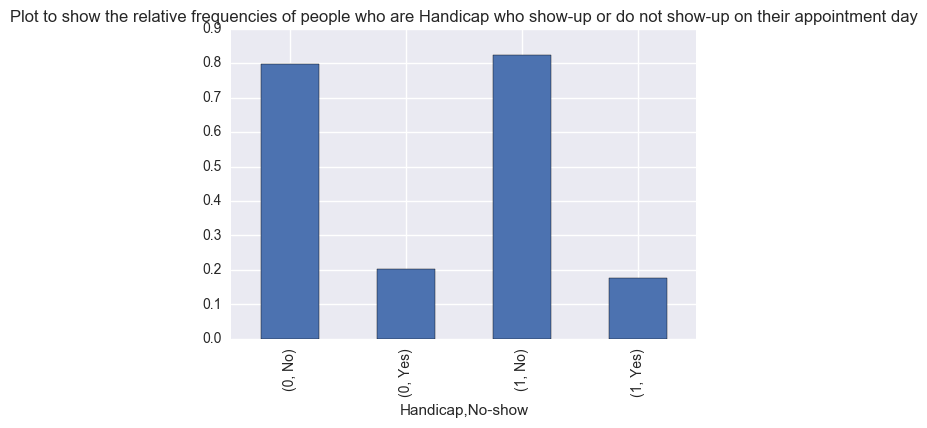

In [49]:
## Making a plot for the above. 
title_handicap_plot = 'Plot to show the relative frequencies of people who are Handicap who show-up or do not show-up on their appointment day'
print_a_plot_for_showup('Handicap', title_handicap_plot)

From the above statistics and plot, I can correlate that the patients who are Handicap, tend to show up on the appointment day more than who are not. 

*From the above analysis, I can correlate that the patients with Hypertension, Diabetes, Handicap diseases tend to show up on the appointment day more than who do not have these diseases.*

*I can also correlate that the people with alcoholism tend to show-up on their appointment equally to the people who do have alcoholism.*

### Analysis for SMS_received

In [50]:
## How many patients received SMS and how many did not.
check_number_of('SMS_received')

SMS_received
0    74881
1    35434
dtype: int64


In [51]:
## Checking for what percentage of people who receive or did not receive an SMS, show-up or do not show-up on their appointment day.
number_of_showup('SMS_received')

SMS_received  No-show
0             No         0.833135
              Yes        0.166865
1             No         0.724135
              Yes        0.275865
Name: No-show, dtype: float64


Axes(0.125,0.125;0.775x0.775)


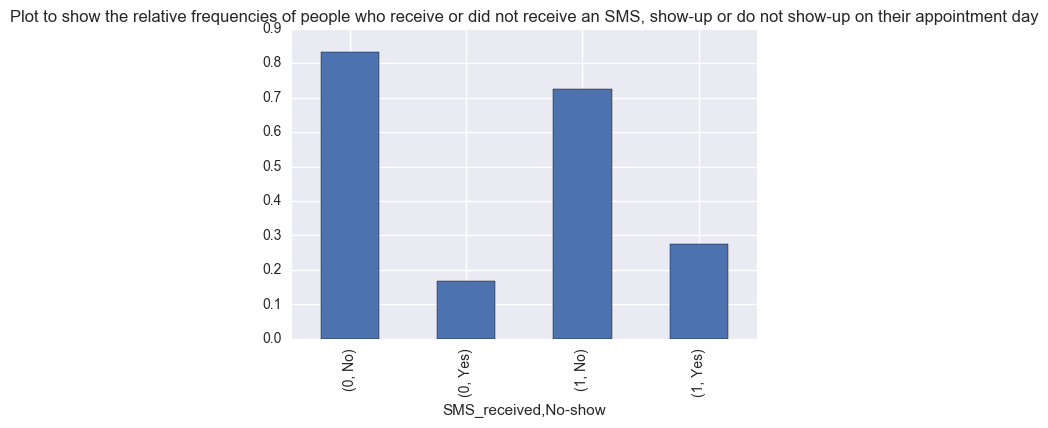

In [52]:
## Making a plot for the above. 
title_sms_received_plot = 'Plot to show the relative frequencies of people who receive or did not receive an SMS, show-up or do not show-up on their appointment day'
print_a_plot_for_showup('SMS_received', title_sms_received_plot)

Here, I noticed that people who received the SMS tend to show up on the appointment day less than the people who did not receive it. It seemed a bit strange to me as why that has happened. It might be because most people ignore such kind of messages.

<a id='conclusions'></a>
## Conclusions

I can conclude that patients not showing up to their appointment can be suffering from alcoholism or are either very young or very old. The patients with Hypertension, Diabetes, Handicap diseases tend to show up on the appointment day more than who do not have these diseases. And, patients in the age group 35-65 tend to show-up in their appointment more than the other age groups. I also notice that gender does not correlate to people showing up or not showing up on their appointment day.

## Limitations
There are certain limitations of the methods I used: 
- I did the cleaning of data which lead to some of the rows not being analysed by me as I deleted them before starting my analysis. Now, that data might be important for making a model based on the analysis.
- Now, as we saw that there are more women who book the appointments that males. This might result in false analysis to some extent. I also removed the patients who were above the age group of 100 which might again end up in tilting of the result a bit.
- I have analysed how each variable or factor is affecting the patients showing up or not showing up on their appointment day. But, we should also analyse how certain variables combined might affect our analysis more. For example, people who have 2 or more diseases together might be showing up more often on their appointments that people with 0 or 1 disease.
- Lastly, all the predictions or correlations which I have done/made does not imply causation. More statistical tests and machine learning algorithms might be required for further analysing and concluding the results.

I have used the following links(resources) to learn and implement in my project:
- https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
- https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/ 
- https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas 
- http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html 
- https://stackoverflow.com/questions/22132525/add-column-with-number-of-days-between-dates-in-dataframe-pandas
- https://stackoverflow.com/questions/24786209/dropping-time-from-datetime-m8-in-pandas 
- https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns
- https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
- https://seaborn.pydata.org/generated/seaborn.countplot.html